In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1, 0.6], [9,11]])

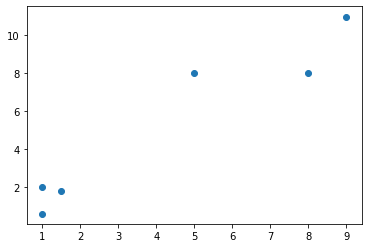

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.show()

# K-means Implementation 

In [42]:
class K_means:
    def __init__(self, k = 2, max_iter = 100):
        self.k = k
        self.max_iter = max_iter
        self.means = []
    def fit(self, data):
        # randomly initialize the means
        for i in range (self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # assign the data point to the cluster that they belong to

            #create empty clusters
            cluster = []
            for j in range(self.k):
                cluster.append([])
            for point in (data):
                # first find distance to all the mean the value
                distances = [((point-m)**2).sum() for m in self.means]
                # find the minimum value
                minDistance = min(distances)
                # find the mean for which we got the minimum distance-->l
                l = distances.index(minDistance)
                # add this to point to cluster l
                cluster[l].append(point)

            # caluculate the new mean value
            change = False
            for j in range(self.k):
                new_mean = np.average(cluster[j], axis=0)
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break; 
    def predict(self, test_data):
        predictions = []
        for point in (test_data):
            # first find distance to all the mean the value
            distances = [((point-m)**2).sum() for m in self.means]
            # find the minimum value
            minDistance = min(distances)
            # find the mean for which we got the minimum distance-->l
            l = distances.index(minDistance)
            # add this to point to cluster l
            predictions.append(l)
        return predictions

In [43]:
kmeans = K_means(2, 100)

In [44]:
kmeans.fit(X)

In [61]:
labels = kmeans.predict(X)
labels

[0, 0, 1, 1, 0, 1]

In [67]:
means = kmeans.means
means = np.array(means)
means

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

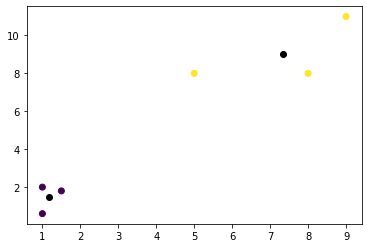

In [69]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(means[:,0], means[:,1], color = 'black')
plt.show()

# K-means Sklearn Implementation 

In [52]:
from sklearn.cluster import KMeans

In [53]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
k_means.labels_

array([0, 0, 1, 1, 0, 1], dtype=int32)

In [55]:
k_means.cluster_centers_

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

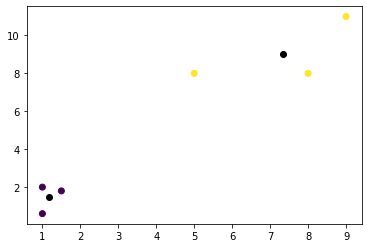

In [70]:
plt.scatter(X[:,0], X[:,1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], color = 'black')
plt.show()

# Sklearn Implemenation on IRIS

In [71]:
from sklearn.datasets import load_iris
data = load_iris()

In [77]:
x = data.data

In [82]:
k_means = KMeans(3)
k_means.fit(x)
predict = k_means.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [97]:
accuracy_score(data.target, predict)

0.8933333333333333